In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np

import os

In [3]:
cm_data = [[0,0,0], [0.2116238095*.25, 0.1897809524*.25, 0.5776761905*.25], 
 [0.212252381*.5, 0.2137714286*.5, 0.6269714286*.5], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:

import suite2p
mask_file = r"C:\Users\zfj\data\training\081122B_region4_67_masks.tif"
mask = suite2p.io.tiff.open_tiff(mask_file, True)[0].pages[0].asarray()
# mask_id = [1, 4, 5, 14, 15, 17, 19, 20, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 156, 159, 160, 161, 162, 166, 168, 169, 173, 174, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
mask_id = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171]
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
# plt.imshow(np.sum(mask == i for i in [60, 139, 141, 145]))

In [5]:
stack_file = r"C:\Users\zfj\data\081122B\region4_stack_00002.tif"
stack = suite2p.io.tiff.open_tiff(stack_file, True)[0]
stack = np.asarray([p.asarray() for p in stack.pages])
print(stack.shape)

(3240, 256, 256)


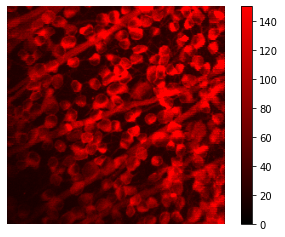

In [20]:
plt.imshow(stack.mean(axis=0), cmap=LinearSegmentedColormap.from_list("Red", [(0,0,0), (1,0,0)]))
plt.clim(0,150)

# plt.imshow(stack.max(axis=0), cmap=LinearSegmentedColormap.from_list("Red", [(0,0,0), (1,0,0)]))
# plt.clim(0,10000)


plt.axis('off')
plt.colorbar()

In [6]:
# data = np.concatenate((
#     np.load(r"C:\Users\zfj\data\100522B\region1_00001\spots_smooth.npy").T,
#     np.load(r"C:\Users\zfj\data\100522B\region1_00002\spots_smooth.npy").T,
# ), axis=1)
# data = np.moveaxis(data,0,1)
# data = np.concatenate((
#     data[:136],
#     data[137:]
# ), axis=0)

# labels = np.concatenate((
#     np.load(r"C:\Users\zfj\data\100522B\region1_00001\spots_labels.npy"),
#     np.load(r"C:\Users\zfj\data\100522B\region1_00002\spots_labels.npy"),
# ), axis=0)
# labels = np.concatenate((
#     labels[:136],
#     labels[137:]
# ), axis=0)
bin_path =r"C:\Users\zfj\data\081122B\func"

labels = np.load(os.path.join(bin_path,'spots_labels.npy'))
data = np.load(os.path.join(bin_path,'spots_smooth.npy'))


In [23]:
data.shape, labels.shape

((170, 1222, 200), (1222,))

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'


Text(0.5, 0.98, 'Mean response')

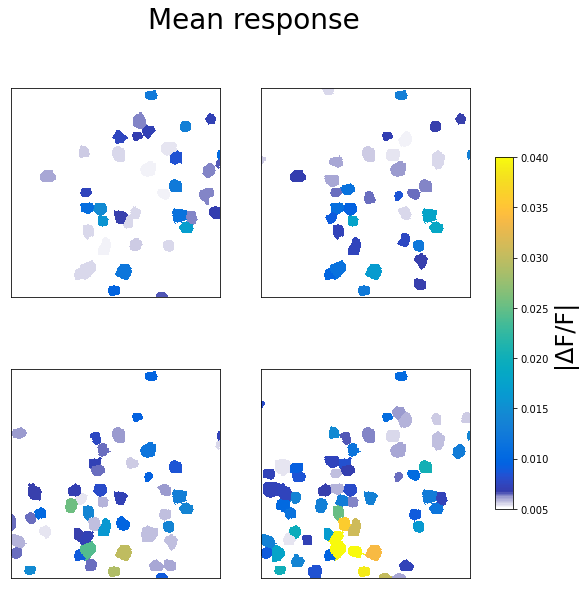

In [19]:
fig,axs = plt.subplots(2,2,figsize=(9,9.5))
axs = axs.flatten()

for i in range(4):
    # plt.figure()
    plt.sca(axs[i])
    E_ON = np.abs(np.nanmean(data[labels==i,34:166,:], axis=(0,1)))

    mm = np.zeros_like(mask, dtype=float)
    for j in range(data.shape[2]):
        mm[mask == mask_id[j]] = E_ON[j]

    im = plt.imshow(mm, interpolation='nearest', alpha=( mask > 0).astype(float), cmap=parula_map)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_facecolor([0,0,0,0])
    # plt.gca().set_facecolor([1,1,1,1])
    
    # plt.colorbar(im, ax=axs[i])
    # im.set_clim(np.percentile(E_ON,1),np.percentile(E_ON,99))
    im.set_clim(.005,.04)

cbar = fig.colorbar(im, ax=axs.ravel().tolist(), fraction=.035)
cbar.set_label("|ΔF/F|", fontsize=24)
fig.suptitle("Mean response", fontsize=28)



In [83]:
E_ON = np.abs(np.nanmean(data[labels==2,34:166,:], axis=(0,1)))
np.argsort(E_ON)

array([149,  40, 169, 143, 145, 126,  48, 157,  21, 142,  24, 170,  98,
       107,  38, 114,  86, 166, 104,  57,  70, 168,  11,  56,  96,  29,
        73,  47, 115,  53, 171,  20,  17, 163,  45,  93, 165,   0,  76,
        69, 162,   5,  87, 159,  66,  23,  92,  49,  34, 152, 132,  44,
       127,  18,  80,  97,  22,  95, 130,   3, 139, 160,  99,  89,  68,
        52, 136, 129, 153,  37,   7,  27,  64,  71,  91, 156,  94, 150,
        77,  46, 118,  88,  19, 155,  51, 135, 106, 102,  72, 151,  30,
         6,  61,  54,  50, 148, 121,  16,  55, 164,  75,  60,  90,   9,
       109,  81, 111, 154, 134, 124,  31,  79, 128,   4,  58, 131,  63,
        43, 100, 141,  67,  36,  15,  35,  14, 101, 103,  42, 133,  39,
       116,  13,  84, 122, 138, 144, 108, 167, 147,  25,  10, 146,  28,
        85,  33,  41,  59,  78,  12,   1, 140, 161,  32,   8, 120, 125,
       105,  74, 158,  65,  82,  26, 110, 137, 113,  62,   2,  83, 117,
       112, 123, 119], dtype=int64)

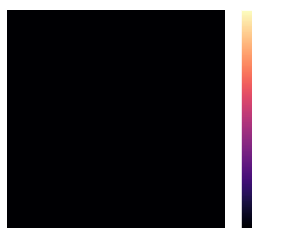

In [11]:
# plt.axes([0,0,0.01,5])
plt.axis('off')
im = plt.imshow(np.zeros((1,1)), cmap='magma')
plt.colorbar()
plt.clim(.002,.04)

(458, 200, 172) (458,)


C:\Users\zfj\AppData\Local\Temp\ipykernel_14400\18938591.py:13: RuntimeWarning: Mean of empty slice.
  line, = axs[ci].plot(xn,p.mean(axis=0), linewidth=0.5)
C:\Users\zfj\AppData\Local\Temp\ipykernel_14400\18938591.py:17: RuntimeWarning: Mean of empty slice.
  (p.mean(axis=0) + 3*p.std(axis=0)/np.sqrt(len(data))).flatten(),
C:\Users\zfj\AppData\Local\Temp\ipykernel_14400\18938591.py:18: RuntimeWarning: Mean of empty slice.
  (p.mean(axis=0) - 3*p.std(axis=0)/np.sqrt(len(data))).flatten(),


(-0.015673724910338672, 0.03606973763174126)

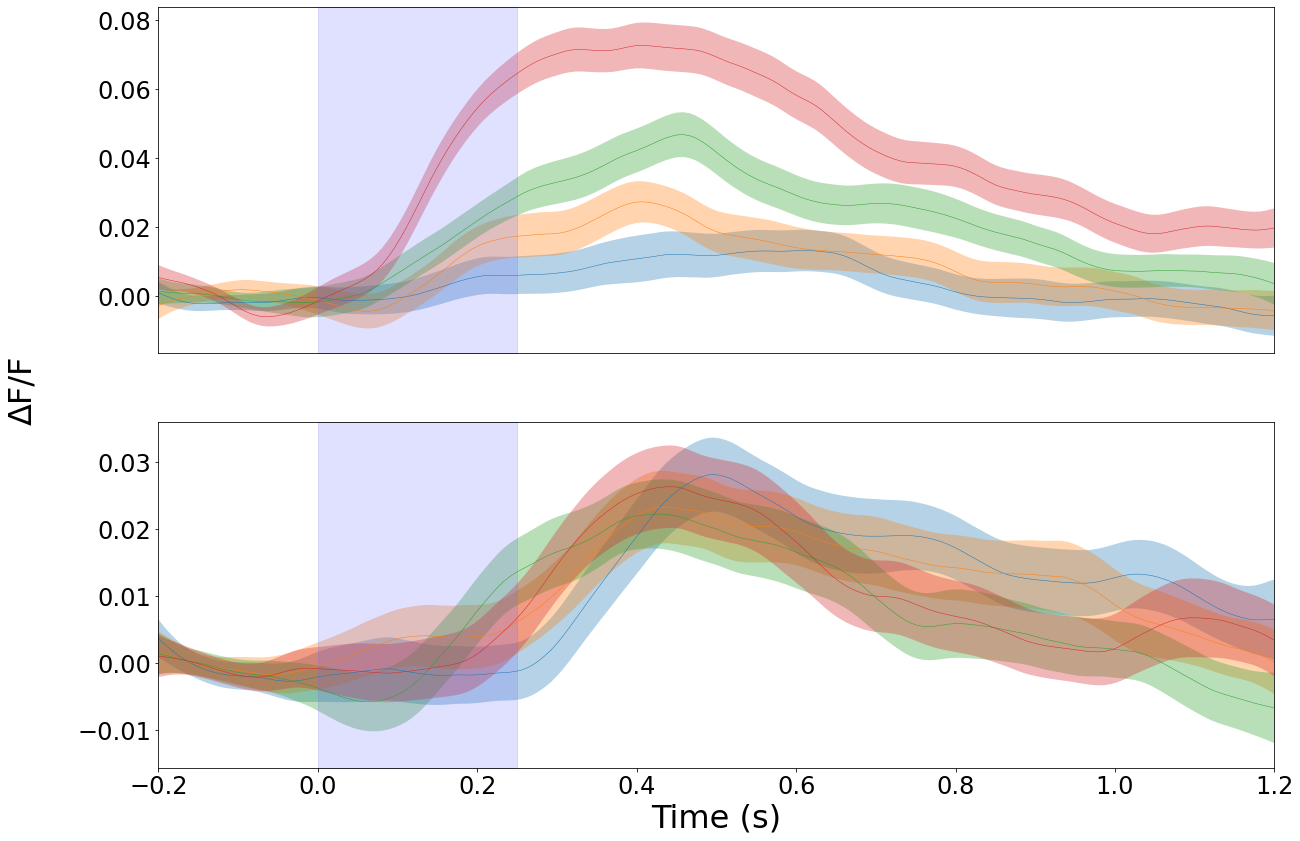

In [71]:
print(data.shape, labels.shape)
cis = [117,158]
# cis = [117,1]


xn = np.linspace(-.25,1.25,200)
_, axs = plt.subplots(2,1,figsize=(20,14))
axs = axs.flatten()
for ci in range(2):
    for i in range(16):
        p = data[labels==i,:,cis[ci]]

        line, = axs[ci].plot(xn,p.mean(axis=0), linewidth=0.5)
        c = line.get_color()
        axs[ci].fill_between(
            xn.flatten(),
            (p.mean(axis=0) + 3*p.std(axis=0)/np.sqrt(len(data))).flatten(),
            (p.mean(axis=0) - 3*p.std(axis=0)/np.sqrt(len(data))).flatten(),
            facecolor = c,
            alpha = 0.33
        )
        # axs[ci].set_title(f'ROI {ci}')
        axs[ci].set_xlim(-.2,1.2)

axs[0].set_xticks([])
axs[0].tick_params(axis='y',labelsize=24)
axs[1].tick_params(axis='both',labelsize=24)

axs[1].set_xlabel('Time (s)', fontsize=32)

plt.gcf().supylabel('ΔF/F', fontsize=32)


c = np.array([102,102,255], dtype=float) / 255
yl = axs[0].get_ylim()
axs[0].fill_between([0,.25],yl[0],yl[1],color=c, alpha =.2)
axs[0].set_ylim(yl)

yl = axs[1].get_ylim()
axs[1].fill_between([0,.25],yl[0],yl[1],color=c, alpha =.2)
axs[1].set_ylim(yl)

Text(0, 0.5, 'Cell 3')

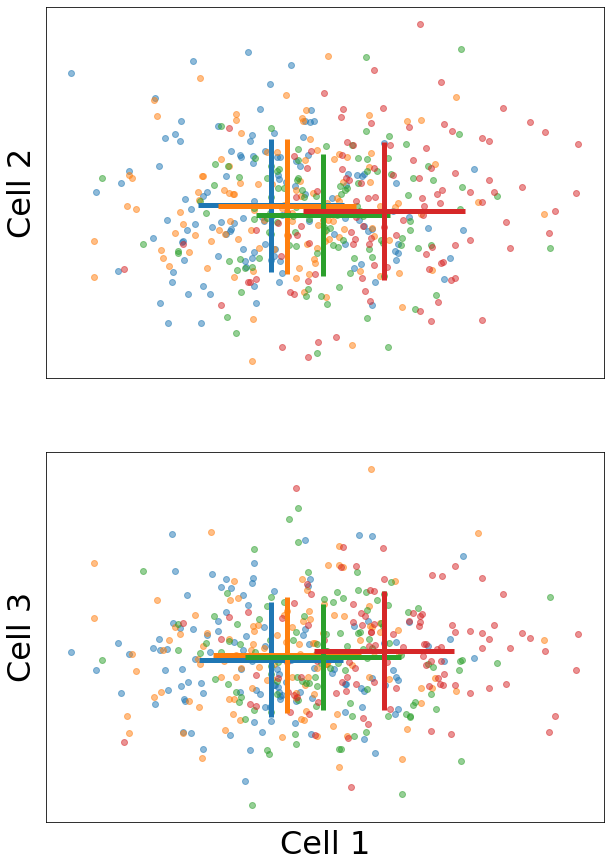

In [91]:
from sklearn.decomposition import PCA

_,axs = plt.subplots(2,1,figsize=(10,15))
plt.sca(axs[0])

cis = [117,158]
decomp = np.empty((data.shape[0],2))
for ci in range(2):
    mod = PCA(n_components=1)
    decomp[:,ci] = mod.fit_transform(data[:,7:-10,cis[ci]]).flatten()

for i in range(4):
    plt.scatter(decomp[labels==i,0], decomp[labels==i,1], alpha=.5)
    
    plt.errorbar(decomp[labels==i,0].mean(), decomp[labels==i,1].mean(), decomp[labels==i,0].std(), decomp[labels==i,1].std(),linestyle="None",linewidth=5)

plt.xticks([])
plt.yticks([])
# plt.xlabel("Cell 1", fontsize=32)
plt.ylabel("Cell 2", fontsize=32)


plt.sca(axs[1])

cis = [117,157]
decomp = np.empty((data.shape[0],2))
for ci in range(2):
    mod = PCA(n_components=1)
    decomp[:,ci] = mod.fit_transform(data[:,7:-10,cis[ci]]).flatten()

for i in range(4):
    si = plt.scatter(decomp[labels==i,0], decomp[labels==i,1], alpha=.5)
    plt.errorbar(decomp[labels==i,0].mean(), decomp[labels==i,1].mean(), decomp[labels==i,0].std(), decomp[labels==i,1].std(),linestyle="None",linewidth=5)

plt.xticks([])
plt.yticks([])
plt.xlabel("Cell 1", fontsize=32)
plt.ylabel("Cell 3", fontsize=32)


In [7]:
print(data.shape, labels.shape)
[np.percentile(np.nanmean(data[:,labels==i,7:-7],axis=1), [2,99.9]) for i in range(17)]

mdata = np.asarray([np.nanmean(data[:,labels==i,7:-10],axis=1) for i in range(17)])

xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
print(mdata.shape)

(170, 1222, 200) (1222,)
(17, 170, 183)


C:\Users\zfj\AppData\Local\Temp\ipykernel_3472\1771400980.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels([f"{i:0.1f}" for i in np.linspace(0,.5,6)],fontsize=24)
MovieWriter ffmpeg unavailable; using Pillow instead.


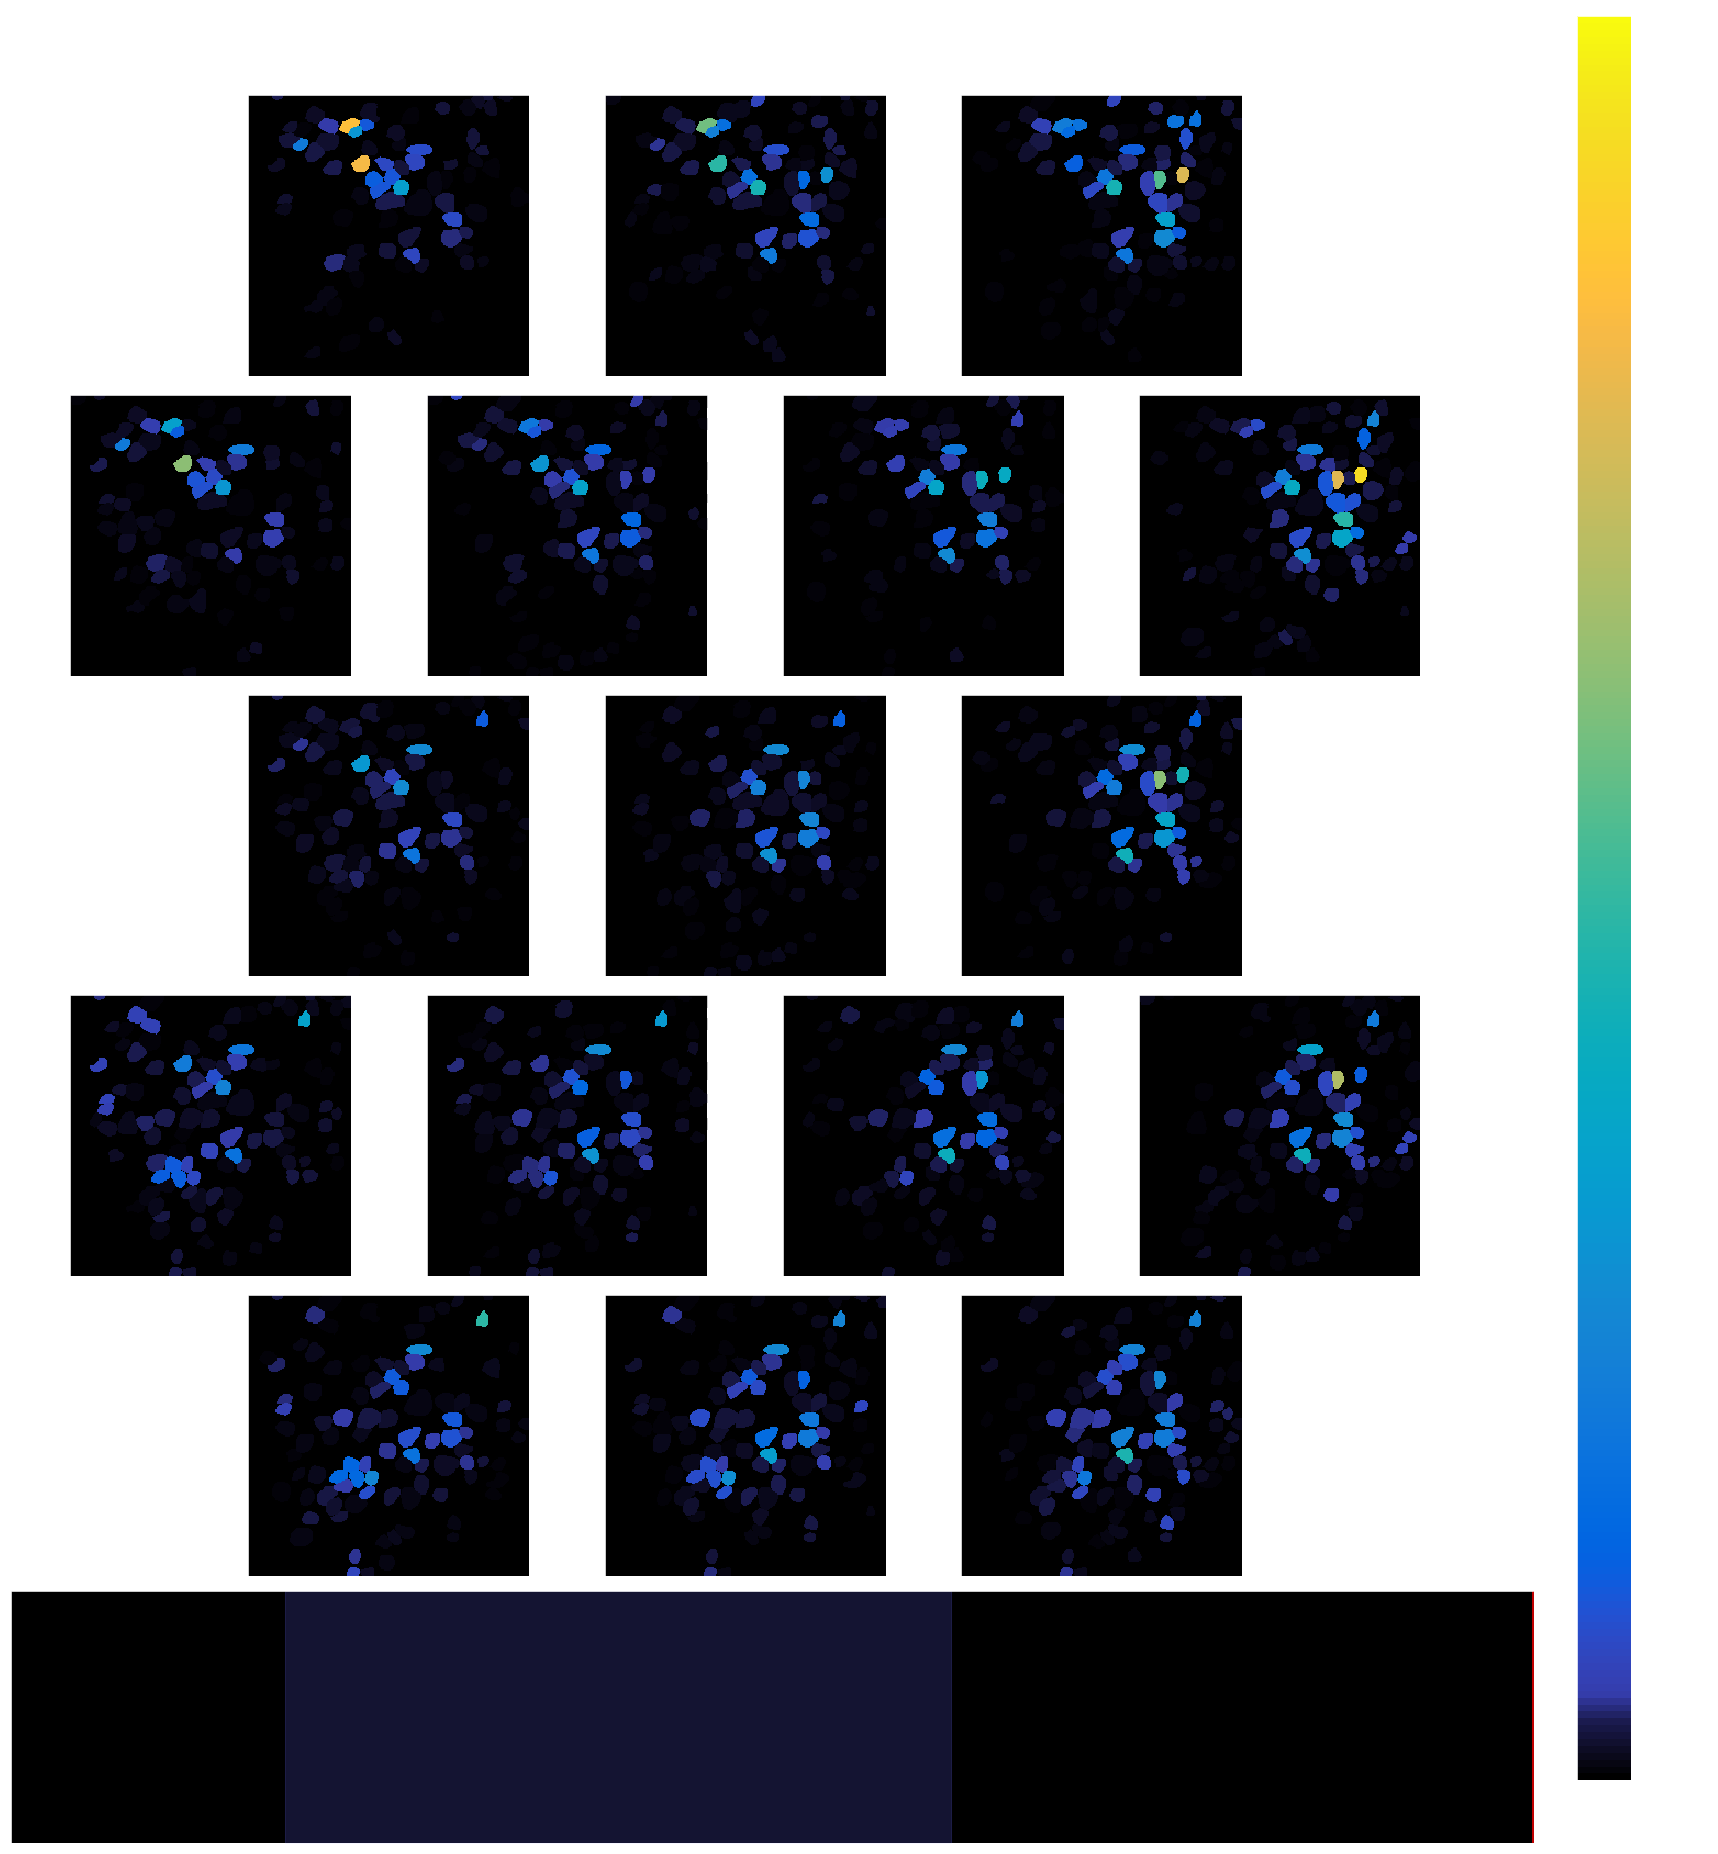

In [26]:
c = np.array([102,102,255], dtype=float) / 255

# fig,axs = plt.subplots(4,4,figsize=(30,35))
fig = plt.figure(figsize=(30,35))
# axs = axs.flatten()
mm = np.zeros_like(mask, dtype=float)
ims = []
for i in range(17):
    mm[:] = 0
    for j in range(len(mask_id)):
        mm[mask == mask_id[j]] = mdata[i,j,0]

    ax = fig.add_axes([-ue[i,0] / 100 + .4, -ue[i,1] / 120 + .46, .13, .13])

    ims.append(ax.imshow(mm, interpolation='nearest', alpha=( mask > 0).astype(float), cmap=parula_map))

    ims[i].set_clim(0.0,0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    

fig.subplots_adjust(right=0.83, bottom=0.23)
cax = fig.add_axes([0.85,0.15,0.025,0.7])
cb = fig.colorbar(ims[0], cax=cax)
cb.set_ticklabels([f"{i:0.1f}" for i in np.linspace(0,.5,6)],fontsize=24)
cb.set_label('ΔF/F', fontsize=32)

stim_ax = fig.add_axes([.125,.125,.705,.1])
stim_ax.set_xticks([])
stim_ax.set_yticks([])
stim_ax.set_xlim(xnn[0],xnn[-1])
stim_ax.set_ylim(0,1)

stim_ax.fill_between([0,.5],0,1,color=c, alpha = 0.2)

l = stim_ax.axvline(xnn[0],0.0,1.0,color='red')


def anim(t):
    for i in range(17):
        mm[:] = 0
        for j in range(len(mask_id)):
            mm[mask == mask_id[j]] = mdata[i,j,t]
        ims[i].set_data(mm)
    l.set_xdata(xnn[t])
    return [*ims, l]

animation.FuncAnimation(fig, anim, frames=183, interval=20, blit=True).save('081122B_mean_resp.gif', fps=30)


([], [])

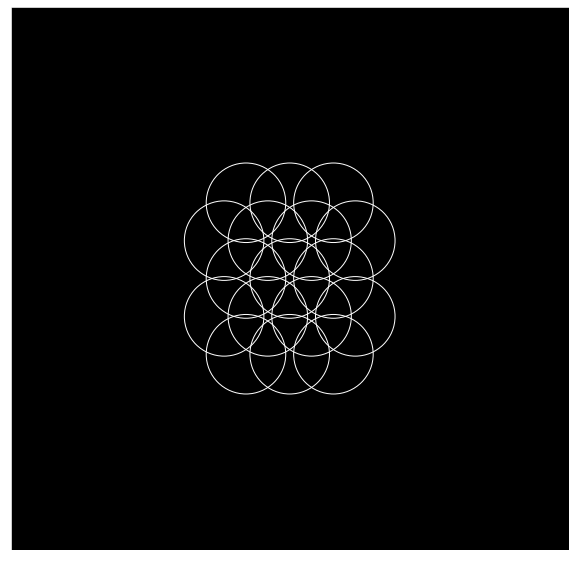

In [25]:
from matplotlib.patches import Ellipse
plt.figure(figsize=(10,10))
ax = plt.gca()

for (x,y) in ue:
    ellipse = Ellipse((x,y), width=30, height=30, facecolor='None', edgecolor='w')

    ax.add_patch(ellipse)


plt.axis('equal')
plt.xlim(-105.25,105.25)
plt.ylim(-105.25,105.25)
plt.xticks([])
plt.yticks([])
# plt.axis('equal')